In [28]:
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 # For image operations
import random # for shuffling
from matplotlib import pyplot as plt, cm
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [ ]:
!pip install -q kaggle

%%capture
!pip install imblearn # install imblearn library for data balancing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meetnagadia/kvasir-dataset  # Download the dataset
!unzip -q kvasir-dataset.zip -d dataset

100% 1.15G/1.15G [00:12<00:00, 144MB/s]
100% 1.15G/1.15G [00:12<00:00, 96.3MB/s]


In [15]:
dataset_path = 'dataset/kvasir-dataset'
classes = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis',
           'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']

In [16]:
class_images = {class_name: [] for class_name in classes}

In [17]:
def load_images_from_folder(class_name, n=400, image_size=(150, 150)):
    folder_path = os.path.join(dataset_path, class_name)
    images = []
    # Get the list of image file names
    filenames = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]
    # Load the images
    for filename in tqdm(filenames[:n], desc=f'Loading {class_name}'):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalizing the image
        images.append(img.flatten())  # Flatten and append to the list
    return images

In [18]:
for class_name in classes:
    class_images[class_name] = load_images_from_folder(class_name)

Loading ulcerative-colitis: 100%|██████████| 400/400 [00:02<00:00, 176.26it/s]


In [19]:
dyed_lifted_polyps = class_images['dyed-lifted-polyps']

In [22]:
len(dyed_lifted_polyps)

400

Each Class has 400 images loaded. Now defining each class into unique variable

In [24]:
dyed_resection_margins = class_images['dyed-resection-margins']
esophagitis=class_images['esophagitis']
normal_cecum=class_images['normal-cecum']
normal_pylorus=class_images['normal-pylorus']
normal_z_line=class_images['normal-z-line']
polyps=class_images['polyps']
ulcerative_colitis=class_images['ulcerative-colitis']

In [25]:
df = pd.DataFrame({
    'dataset': ['dyed_lifted_polyps', 'dyed_resection_margins', 'esophagitis', 'normal_cecum', 'normal_pylorus', 'normal_z_line', 'polyps', 'ulcerative_colitis'],
    'count_of_images': [len(dyed_lifted_polyps), len(dyed_resection_margins), len(esophagitis), len(normal_cecum), len(normal_pylorus), len(normal_z_line), len(polyps), len(ulcerative_colitis)]})

                  dataset  count_of_images
0      dyed_lifted_polyps              400
1  dyed_resection_margins              400
2             esophagitis              400
3            normal_cecum              400
4          normal_pylorus              400
5           normal_z_line              400
6                  polyps              400
7      ulcerative_colitis              400


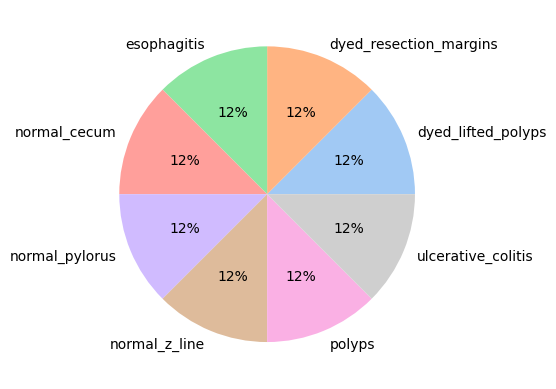

In [26]:
color = sns.color_palette('pastel')
plt.pie(df['count_of_images'], labels = df.dataset, colors = color, autopct='%.0f%%')

print(df)
plt.show()